In [1]:
!pip install tensorflow-gpu==2.7.0-rc0
!pip install keras==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 29.7 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires keras<2.9,>=2.8.0rc0, but you have keras 2.7.0 which is incompatible.
tensorflow 2.8.2+zzzcolab20220719082949 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.


In [2]:
!pip install -q kaggle

In [3]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! cp kaggle.json ~/.kaggle/ 

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d miracle9to9/files1

files1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#using 2.7.0 version because getting this error in the 2.8.0 version (Import "tensorflow.keras" could not be resolved(reportMissingImports))
#seems like it is an version issue
print(tf.__version__, keras.__version__)

2.7.0-rc0 2.7.0


In [8]:
import numpy as np
import matplotlib.pyplot as plt


In [9]:
image_height = 100
image_widht = 100
#setting the image height and widht as 100 because in the folder the size of input images are different

In [10]:
data_generator = ImageDataGenerator(rescale=1.0/255., validation_split = 0.2)
#rescaling the pixels of the picture in between 0 to 1 and using 20 percent of data as validation set

In [11]:
train_data_generator = data_generator.flow_from_directory(directory='/content/Malaria Cells/training_set',target_size=(image_widht, image_height), class_mode = 'binary' , batch_size = 16,subset = 'training')
#reads two classes parasitized and uninfected , then it reduces it to the required target size, batch size tells the amount of images to read at once.

Found 22048 images belonging to 2 classes.


In [12]:
validation_data_generator = data_generator.flow_from_directory(directory='/content/Malaria Cells/training_set',target_size=(image_widht,image_height), class_mode = 'binary', batch_size = 16, subset='validation')
#does the similar thing but for the validation set

Found 5510 images belonging to 2 classes.


In [13]:
train_data_generator.labels


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [14]:
validation_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [22]:
#now building the model
model = Sequential()
#layer 1
model.add(Conv2D(16,(3,3), input_shape = (image_widht , image_height, 3), activation = "relu"))
#no of nodes is 16 and the kernel size (filter matrix) is 3*3, input shape contains the widht , height and 3 because it is an rgb image
#using relu as the activation function for the best result
#convolution is 2-d matrix and deal with the input images
model.add(MaxPool2D(2,2))
#pooling size for the first layer is 2*2
model.add(Dropout(0.2))
#using dropout in first layer to drop 0.2 of the nodes randomly so that the data does not overfit
#layer 2
model.add(Conv2D(32, (3,3), activation='relu'))
#no of nodes is 32 and the kernel size is 3*3
model.add(MaxPool2D(2,2))
#pooling size for the second layer is 2*2
#using relu as the activation function for the best result
model.add(Dropout(0.3))
#using dropout in second layer to drop 0.3 of the nodes randomly so that the data does not overfit
model.add(Flatten())
#flattening the data this is converting the multi-dimensional data into a vector
#output layer
model.add(Dense(64, activation='relu'))
#implements y=mx+b calculation
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
#will have only one o/p node because it is binary classification and therefore using sigmoid activation function

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 16)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 49, 49, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 23, 23, 32)       

In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
#using adam optimization which finds the best learning rate, loss function used is cross entropy loss, metrics used is accuracy which measures how close the predicted value is to the actual value.

In [25]:
history = model.fit_generator( generator = train_data_generator, validation_data = validation_data_generator, epochs = 5)
#model groups the layers into an object with features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
1378/1378 [==============================] - 208s 150ms/step - loss: 0.4524 - accuracy: 0.8024 - val_loss: 0.2431 - val_accuracy: 0.9274
Epoch 2/5
1378/1378 [==============================] - 204s 148ms/step - loss: 0.2186 - accuracy: 0.9326 - val_loss: 0.1972 - val_accuracy: 0.9332
Epoch 3/5
1378/1378 [==============================] - 208s 151ms/step - loss: 0.1914 - accuracy: 0.9387 - val_loss: 0.1901 - val_accuracy: 0.9365
Epoch 4/5
1378/1378 [==============================] - 207s 150ms/step - loss: 0.1789 - accuracy: 0.9400 - val_loss: 0.1943 - val_accuracy: 0.9327
Epoch 5/5
1378/1378 [==============================] - 206s 149ms/step - loss: 0.1706 - accuracy: 0.9397 - val_loss: 0.2302 - val_accuracy: 0.8887


In [19]:
history.history
#prints the history of accuracy and other parameters in each epoch

{'accuracy': [0.7208817005157471,
  0.9241201281547546,
  0.9305152297019958,
  0.9330098032951355,
  0.9351415038108826],
 'loss': [0.5564818978309631,
  0.2368331104516983,
  0.20323601365089417,
  0.1866977959871292,
  0.17879654467105865],
 'val_accuracy': [0.9003629684448242,
  0.9292196035385132,
  0.9297640919685364,
  0.9339382648468018,
  0.9294010996818542],
 'val_loss': [0.31402429938316345,
  0.1933748424053192,
  0.21052123606204987,
  0.1835140436887741,
  0.21612723171710968]}

In [20]:
def plot_curve(history, epoch):
  # plotting training and validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # plotting training and validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

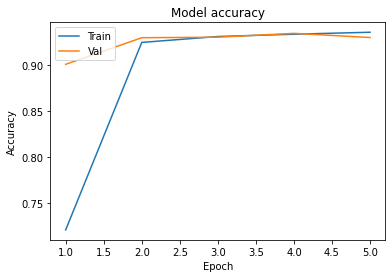

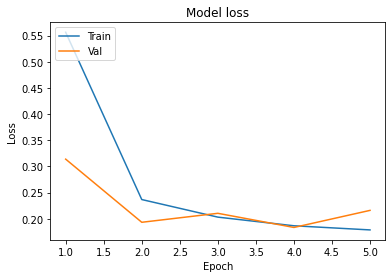

In [21]:
plot_curve(history, 5)